In [1]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is this number signficantly different?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 3 or larger with respect a normal distribution.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

Z score = 3.47 >3
Pvalue = 0.00084 <0.05
(Probability of observing 15 hurricanes in a year, given the assumed distribution: 0.084 %)
=> We reject the null hypothesis at significance level 0.5:
15 hurricanes are not exspectable within the assumed distribution.


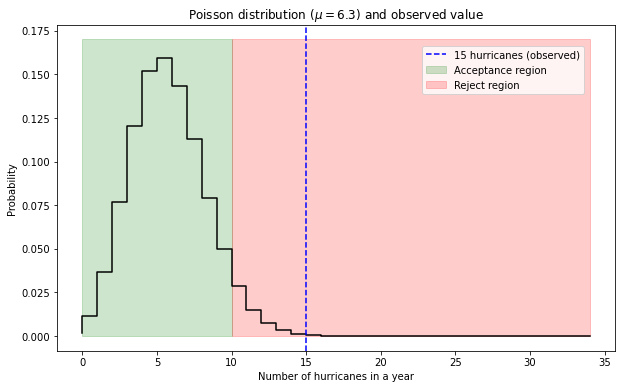

In [2]:
#Exercise 1

n=15
average = 6.3
x = np.arange(0,35,1) # Number of hurricanes is a positive integer
y = stats.poisson.pmf(x,average) #Poisson distribution having the observed average

alpha = 0.05 #Threshold for hypothesis acceptance

#H0: 15 hurricanes are allowed by the distribution (prob to observe at least 15 hurricanes in a year is > 5%)
#H1: 15 hurricanes are not allowed by the distribution (prob to observe at least 15 hurricanes in a year is < 5%)

acceptance_region = x[y.cumsum()<1-alpha]
threshold = acceptance_region[-1] #Last value of x at which the cumulative sum is <0.95

fig, _ = plt.subplots(figsize=(10, 6))
plt.step(x,y,color = "black")
plt.fill_between(x,0,0.17,where=x<=threshold,color="green", alpha=0.2, label="Acceptance region")
plt.fill_between(x,0,0.17,where=x>=threshold,color="red", alpha=0.2, label="Reject region")
plt.axvline(n, linestyle='--', color="blue", label="15 hurricanes (observed)")
plt.legend(bbox_to_anchor=(0.645,0.95))
plt.title("Poisson distribution ($\mu=6.3$) and observed value")
plt.xlabel("Number of hurricanes in a year")
plt.ylabel("Probability")

Z_score = np.abs(n - average) / np.sqrt(average) # Poisson distribution: sigma = sqrt(mu)
print("Z score = %.2f" %Z_score, ">3")

pvalue = 1-stats.poisson.cdf(n,6.3)
print("Pvalue = %.5f" % pvalue, "<0.05")
print("(Probability of observing 15 hurricanes in a year, given the assumed distribution: %.3f" % (pvalue*100), "%)")
print("=> We reject the null hypothesis at significance level 0.5:")
print("15 hurricanes are not exspectable within the assumed distribution.")

2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

Pvalue (left + right) = 0.0031 <0.05
=> The null hypothesis is rejected at a significance level of 0.05:
the two distributions are different, the exposure has an effect on the pressure


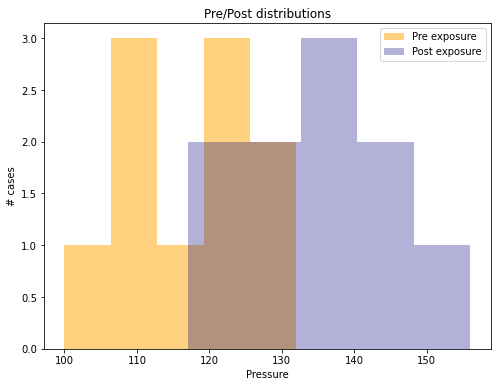

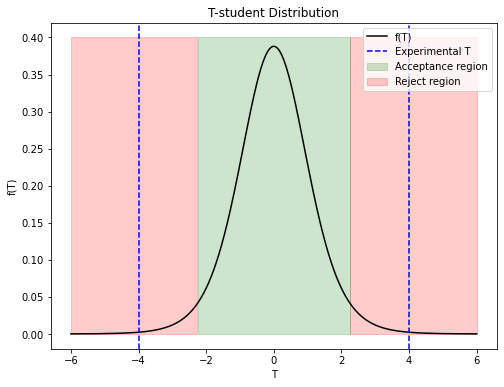

In [3]:
#Exercise 2

#I assume two normally distribuited datasets, with similar variance
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
n=len(pre)

fig, ax1 = plt.subplots(figsize=(8, 6))

#Plot of the two distributions
ax1.hist(pre, bins=5, color="orange", alpha=0.5, label="Pre exposure")
ax1.hist(post, bins=5, color="navy", alpha=0.3, label="Post exposure")
ax1.set_ylabel("# cases")
ax1.set_xlabel("Pressure")
ax1.set_title("Pre/Post distributions")
ax1.legend(loc="upper right")

#T test
sigma = np.sqrt((pre.std()**2+post.std()**2) /2)
T = (pre.mean() - post.mean()) / (sigma * np.sqrt(2/n))

x = np.linspace(-6,6, 1000)
y = stats.t.pdf(x, n - 1)

#Half of the area (0.025) is under the right tail, and half (0.025) under the left tail
threshold = stats.t.ppf(0.025, n - 1) #Quantile function (inverse CDF)

fig, ax2 = plt.subplots(figsize=(8, 6))
ax2.plot(x, y, color="black", label="f(T)")
ax2.fill_between(x, 0,0.40, where=np.abs(x)<=np.abs(threshold), color="green", alpha=0.2, label="Acceptance region")
ax2.fill_between(x, 0,0.40, where=np.abs(x)>=np.abs(threshold), color="red", alpha=0.2, label="Reject region")
ax2.axvline(T, linestyle= "--", color= "blue")
ax2.axvline(-T, linestyle="--", color="blue", label="Experimental T")
ax2.set_ylabel("f(T)")
ax2.set_xlabel("T")
ax2.set_title("T-student Distribution")
ax2.legend(loc="upper right")

pvalue_right = stats.t.cdf(T, n - 1)
pvalue_left =1. - stats.t.cdf(-T, n - 1)

pvalue = pvalue_left+pvalue_right
print("Pvalue (left + right) = %.4f" %pvalue, "<0.05")
print("=> The null hypothesis is rejected at a significance level of 0.05:" )
print("the two distributions are different, the exposure has an effect on the pressure")



3\. **FFT of a simple dataset**

Perform a periodicity analysis on the lynxs-hares population, i.e. determine what is the period of the population of these animals.

# year	hare	lynx	carrot
1900	30e3	4e3	48300
1901	47.2e3	6.1e3	48200
1902	70.2e3	9.8e3	41500
1903	77.4e3	35.2e3	38200
1904	36.3e3	59.4e3	40600
1905	20.6e3	41.7e3	39800
1906	18.1e3	19e3	38600
1907	21.4e3	13e3	42300
1908	22e3	8.3e3	44500
1909	25.4e3	9.1e3	42100
1910	27.1e3	7.4e3	46000
1911	40.3e3	8e3	46800
1912	57e3	12.3e3	43800
1913	76.6e3	19.5e3	40900
1914	52.3e3	45.7e3	39400
1915	19.5e3	51.1e3	39000
1916	11.2e3	29.7e3	36700
1917	7.6e3	15.8e3	41800
1918	14.6e3	9.7e3	43300
1919	16.2e3	10.1e3	41300
1920	24.7e3	8.6e3	47300


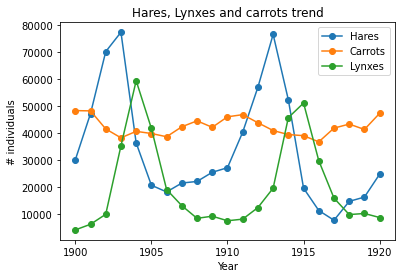

In [4]:
#Exercise 3

data = np.loadtxt("Data/populations.txt") 
!cat Data/populations.txt

year, hares, lynxes, carrots = data.T

#I visualize the trend
plt.plot(year, hares, year, carrots, year, lynxes, marker="o") 
plt.xticks(np.arange(1900,1921,5))
plt.title("Hares, Lynxes and carrots trend")
plt.xlabel("Year")
plt.ylabel("# individuals")
plt.legend(("Hares", "Carrots", "Lynxes"))

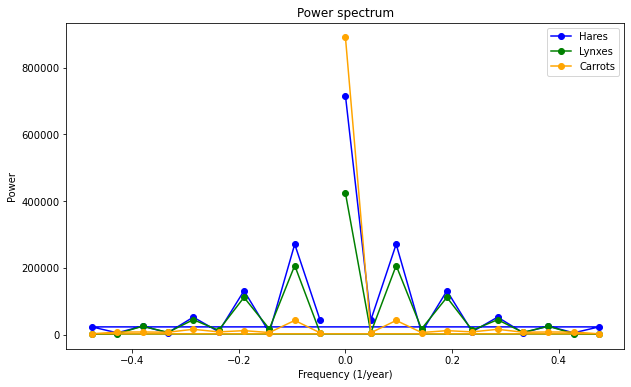


 Hares 

Peak frequency = 0.095  (1/years) 	 Period = 10.500  (years)
Peak frequency = 0.095  (1/years) 	 Period = 10.500  (years)
Peak frequency = 0.095  (1/years) 	 Period = 10.500  (years)
Peak frequency = 0.095  (1/years) 	 Period = 10.500  (years)
Peak frequency = 0.095  (1/years) 	 Period = 10.500  (years)
Peak frequency = 0.095  (1/years) 	 Period = 10.500  (years)
Peak frequency = 0.095  (1/years) 	 Period = 10.500  (years)
Peak frequency = 0.095  (1/years) 	 Period = 10.500  (years)

 Lynxes 

Peak frequency = 0.095  (1/years) 	 Period = 10.500  (years)
Peak frequency = 0.095  (1/years) 	 Period = 10.500  (years)
Peak frequency = 0.095  (1/years) 	 Period = 10.500  (years)
Peak frequency = 0.095  (1/years) 	 Period = 10.500  (years)
Peak frequency = 0.095  (1/years) 	 Period = 10.500  (years)
Peak frequency = 0.095  (1/years) 	 Period = 10.500  (years)
Peak frequency = 0.095  (1/years) 	 Period = 10.500  (years)
Peak frequency = 0.095  (1/years) 	 Period = 10.500  (years)

 C

In [5]:
#Periodicity analysis on the lynxs-hares population

from scipy import fftpack

#fft 
hares_fft = fftpack.fft(hares)
lynxes_fft = fftpack.fft(lynxes)
carrots_fft = fftpack.fft(carrots)

#pover spectra
power_hares = np.abs(hares_fft)
power_lynxes = np.abs(lynxes_fft)
power_carrots = np.abs(carrots_fft)


#frequencies
freq_hares = fftpack.fftfreq(hares_fft.size, d=1.)
freq_lynxes = fftpack.fftfreq(hares_fft.size, d=1.)
freq_carrots = fftpack.fftfreq(carrots_fft.size, d=1.)


#Power spectrum comparison
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(freq_hares, power_hares, marker="o",  color="blue", label="Hares")
ax.plot(freq_lynxes, power_lynxes, marker="o", color="green", label="Lynxes")
ax.plot(freq_carrots, power_carrots, marker="o", color="orange",label="Carrots")
ax.set_title("Power spectrum")
ax.set_xlabel("Frequency (1/year)")
ax.set_ylabel("Power")
ax.legend(loc="upper right")
plt.show()


#Peak positions and periodicity
print("\n Hares \n")
for i in range(2,int(len(freq_hares)/2)): #spectrum is symmetric. I consider only positive frequencies.
    f=freq_hares[i]-freq_hares[i-2]
    T= 1/f
    print("Peak frequency = %.3f " %f , "(1/years)", "\t", "Period = %.3f " % T, "(years)" )

print("\n Lynxes \n")
for i in range(2,int(len(freq_lynxes)/2)): #spectrum is symmetric. I consider only positive frequencies.
    f=freq_lynxes[i]-freq_lynxes[i-2]
    T= 1/f
    print("Peak frequency = %.3f " %f , "(1/years)", "\t", "Period = %.3f " % T, "(years)" )

print("\n Carrots \n")
for i in range(2,int(len(freq_carrots)/2)): #spectrum is symmetric. I consider only positive frequencies.
    f=freq_carrots[i]-freq_carrots[i-2]
    T= 1/f
    print("Peak frequency = %.3f " %f , "(1/years)", "\t", "Period = %.3f " % T, "(years)" )

print("\n")
print("=> For hares, lynxes and carrots, all the peaks give consistent information about the periodicity of the population:")
print("The period is 10.5 years for all the species")

4\. **FFT of an image**

Write a filter that removes the periodic noise from the `moonlanding.png` image by using a 2-dimensional FFT.

* Import the image as a 2D numpy array using `plt.imread("moonlanding.png")`. Examine the image with `plt.imshow()`, which is heavily contaminated with periodic noise.
* Check the documentation of the `scipy.fftpack` package, and find the method that performs a 2D FFT. Plot the spectrum (Fourier transform of) the image. **Hint**: use `LogNorm` to plot the colors in log scale:
```Python
from matplotlib.colors import LogNorm
plt.imshow(image, norm=LogNorm(vmin=5))
```
* Inspect the spectrum, and try to locate the regions of the power spectrum that contain the signal and those which contain the periodic noise. Use array slicing to set the noise regions to zero.
* Apply the inverse Fourier transform to plot the resulting image.

In [6]:
#Exercise 4

Text(0, 0.5, '# pixel')

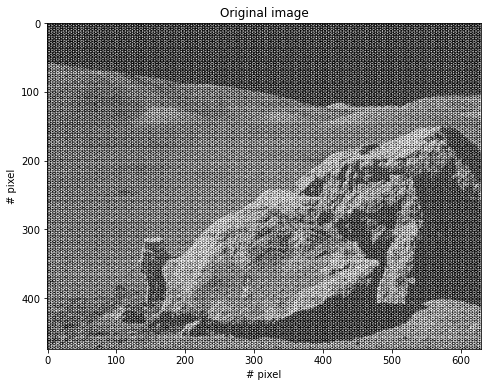

In [7]:
#Import the image as a 2D numpy array using plt.imread("moonlanding.png"). 
#Examine the image with plt.imshow(), which is heavily contaminated with periodic noise.

image = plt.imread("Data/moonlanding.png")#.astype(float)

plt.figure(figsize=(12,6))
plt.imshow(image,cmap = plt.get_cmap('gray'))
plt.title("Original image")
plt.xlabel("# pixel")
plt.ylabel("# pixel")

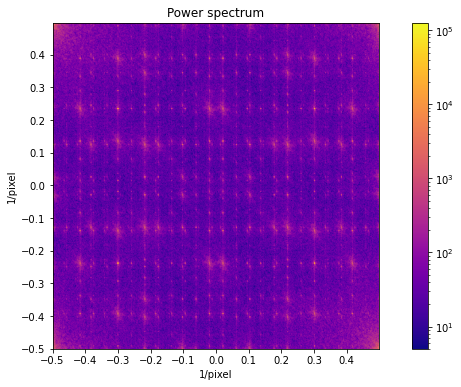

In [8]:
# Plot the spectrum (Fourier transform of) the image.

from scipy.fftpack import fft2, ifft2, fftfreq
from matplotlib.colors import LogNorm

#Fourier transformation
fft_image = fft2(image)
power_image = np.abs(fft_image)

#Plot of the spectrum
fx = fftfreq(image.shape[0])
fy = fftfreq(image.shape[1])
extremes = fx.min(),fx.max(),fy.min(),fy.max()

plt.figure(figsize=(12,6))
plot=plt.imshow(power_image, norm=LogNorm(vmin=5), cmap="plasma", extent= extremes)
plt.xticks(np.arange(fx.min(),fx.max(),0.1))
plt.yticks(np.arange(fy.min(),fy.max(),0.1))
plt.colorbar(plot)
plt.xlabel("1/pixel")
plt.ylabel("1/pixel")
plt.title("Power spectrum")
plt.show()

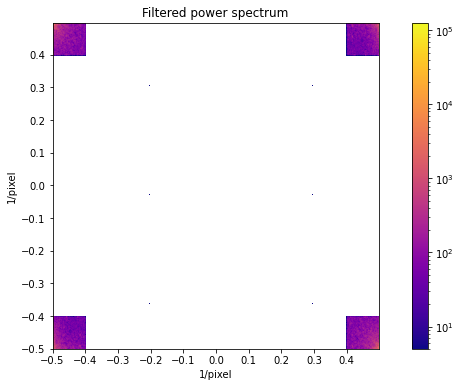

In [9]:
#Inspect the spectrum, and try to locate the regions of the power spectrum that contain the signal and those which contain the periodic noise. 
#Use array slicing to set the noise regions to zero.


fcut = 0.1 #Chosen looking at the power spectrum

#low-pass filter
fft_image[abs(fx)>=fcut,:] = 0
fft_image[:,abs(fy)>=fcut] = 0

power_image=np.abs(fft_image)

#Plot of the filtered spectrum
plt.figure(figsize=(12,6))
plot2 = plt.imshow(power_image, norm=LogNorm(vmin=5), cmap="plasma", extent = extremes)
plt.xticks(np.arange(fx.min(),fx.max(),0.1))
plt.yticks(np.arange(fy.min(),fy.max(),0.1))
plt.colorbar(plot2)
plt.xlabel("1/pixel")
plt.ylabel("1/pixel")
plt.title("Filtered power spectrum")
plt.show()

Text(0, 0.5, '# pixel')

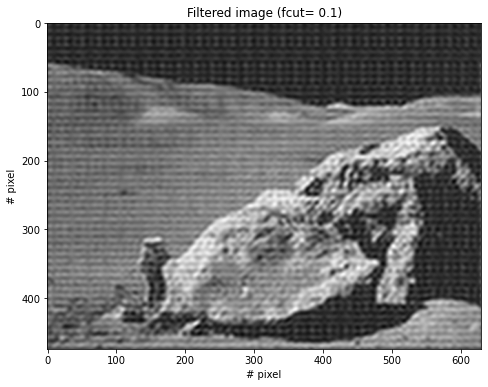

In [10]:
# Apply the inverse Fourier transform to plot the resulting image.

#Inverse fft
ift_image = ifft2(fft_image)
power_ift_image = np.abs(ift_image)


#Plot of the resulting image
plt.figure(figsize=(12,6))
plt.imshow(power_ift_image,cmap = plt.get_cmap('gray'))
plt.title("Filtered image (fcut= %.1f)" % fcut)
plt.xlabel("# pixel")
plt.ylabel("# pixel")